# Student flow correlation matrix
Calculate a 2D array of incoming and outgoing countries


| country | CZ   | SK   | DE   |
|---------|------|------|------|
| CZ      | 0    |CZ->SK|CZ->DE|
| SK      |SK->CZ| 0    |SK->DE|
| DE      |DE->CZ|DE->SK| 0    |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel("../Student_Mobility_2013-14.xlsx")
df = df[df.MobilityType == "Mob-SMS"]

In [4]:
res = df[["SendingCountry", "ReceivingCountry", "MobiilityID"]]\
    .groupby(by=["SendingCountry", "ReceivingCountry"]).count().unstack().fillna(0)

In [5]:
res.columns = [col[1] for col in res.columns]

In [6]:
res.index.name = "sending"

In [7]:
# PT sent in total
df[["SendingCountry", "MobiilityID"]].groupby(by=["SendingCountry"]).count().T.PT

MobiilityID    5325
Name: PT, dtype: int64

In [8]:
# PT received in total
df[["ReceivingCountry", "MobiilityID"]].groupby(by=["ReceivingCountry"]).count().T.PT

MobiilityID    9020
Name: PT, dtype: int64

In [9]:
res = res.T

In [10]:
# How many students has PT sent
print("Sum of columnt PT", sum(res.PT))

Sum of columnt PT 5325.0


In [11]:
# How many students has PT received
print("Sum of row PT", np.sum(res[res.index == "PT"].values))

Sum of row PT 9020.0


In [43]:
res = res.astype(int)
# lowercase columns
res.columns = map(str.lower, res.columns)
# lowercase index
res.index = map(str.lower, res.index)
res.index.name = "country"

In [45]:
res.to_csv("../../src/data/map/corstudentcount.csv")

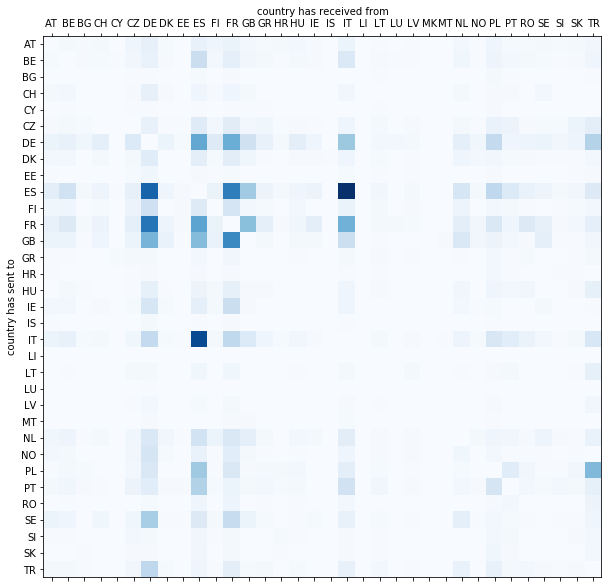

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
ax.matshow(res, cmap=plt.get_cmap('Blues'))
ax.set_xticks(np.arange(0, len(res.columns.values)))
ax.set_yticks(np.arange(0, len(res.index.values)))
ax.set_yticklabels(res.index.values)
ax.set_xticklabels(res.columns.values)
ax.xaxis.set_label_position('top') 
ax.set_ylabel("country has sent to")
ax.set_xlabel("country has received from")
plt.show()